1.1. Выборочные характеристики

In [2]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=5ebbf88fd0e0b8a1cebc313f576ed304e7949a4f36daaddcd694e93c0c67ee7d
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [153]:
import pandas as pd
import numpy as np
import xlrd
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
from scipy.stats import skew, norm, kurtosis
import seaborn as sns
import math
from math import sqrt
import pingouin as pg
%matplotlib inline
xls = pd.ExcelFile(r"/content/drive/MyDrive/МАТ СТАТ/БДЗ/table.xls")
sheetX = xls.parse(2)
var1 = sheetX['B8']
X1 = np.delete(np.array(var1), 41)
var2 = sheetX['B10']
X2 = np.array(var2)
var3 = sheetX['B13']
X3 = np.array(var3)
np.size(X1)

251

In [4]:
m1 = np.mean(X1)
m2 = np.mean(X2)
m3 = np.mean(X3)
print("mean:", m1, m2, m3)

mean: 70.31075697211155 100.82420634920635 59.405952380952385


In [5]:
s1 = np.var(X1, ddof=1)
s2 = np.var(X2, ddof=1)
s3 = np.var(X3, ddof=1)
print("var:", s1, s2, s3)

var: 6.834543824701195 71.07291769430215 27.561996300512234


In [6]:
std1 = np.std(X1, ddof=1)
std2 = np.std(X2, ddof=1)
std3 = np.std(X3, ddof=1)
print("std:", std1, std2, std3)

std: 2.614296047639057 8.43047553192002 5.249952028401044


In [7]:
#выб. ассиметрия
print(skew(X1), skew(X2), skew(X3))

0.09828450553799732 0.6774921031936455 0.8163133125858555


In [8]:
#выб. эксцесс
print(kurtosis(X1), kurtosis(X2), kurtosis(X3))

-0.42846361057690974 0.9440863933615615 2.589400899302711


1.2. Группировка и гистограммы частот

In [9]:
var = sheetX['B8']
X = np.array(var)
X[41]

29.5

In [10]:
X = np.delete(X, 41)

In [11]:
hist, bin_edges = np.histogram(X, bins=9)
bin_edges

array([64.        , 65.52777778, 67.05555556, 68.58333333, 70.11111111,
       71.63888889, 73.16666667, 74.69444444, 76.22222222, 77.75      ])

In [12]:
stored, stored1 = 0, 0
Xf, Xf1, Xf2 = [], [], []
count = 0
for i in range(9):
    arr = X[bin_edges[i] <= X]
    arr1 = arr[arr < bin_edges[i + 1]]
    if i == 8:
        arr = X[bin_edges[i] <= X]
        arr1 = arr[arr <= bin_edges[i + 1]]
    stored += len(arr1)
    stored1 += round(len(arr1)/len(X), 3)
    Xf.append(stored)
    Xf1.append(stored1)
    Xf2.append(len(arr1))
    count += 1
    print(count, round(bin_edges[i], 2), round(bin_edges[i+1], 2), len(arr1),
          round(len(arr1)/len(X), 3), stored, round(stored1, 3), sep='  ')

1  64.0  65.53  6  0.024  6  0.024
2  65.53  67.06  20  0.08  26  0.104
3  67.06  68.58  45  0.179  71  0.283
4  68.58  70.11  55  0.219  126  0.502
5  70.11  71.64  45  0.179  171  0.681
6  71.64  73.17  40  0.159  211  0.84
7  73.17  74.69  31  0.124  242  0.964
8  74.69  76.22  7  0.028  249  0.992
9  76.22  77.75  2  0.008  251  1.0


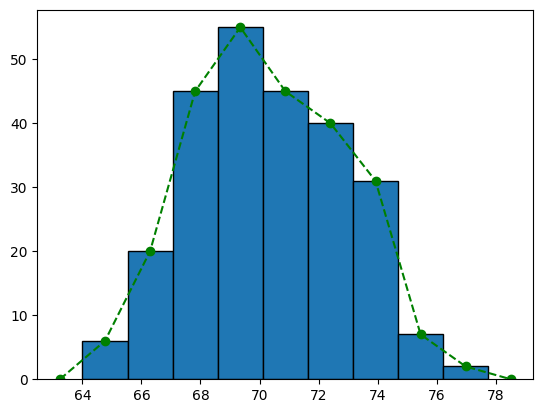

In [13]:
a,bins,_ = plt.hist(X, density=False, edgecolor='black',bins=9)
x = np.append([0], a)
x = np.append(x, [0])
width = (X.max() - X.min())/9
bins = np.append([bins[0] - width], bins)
y = bins + width / 2
plt.plot(y, x,'go--')
plt.show()

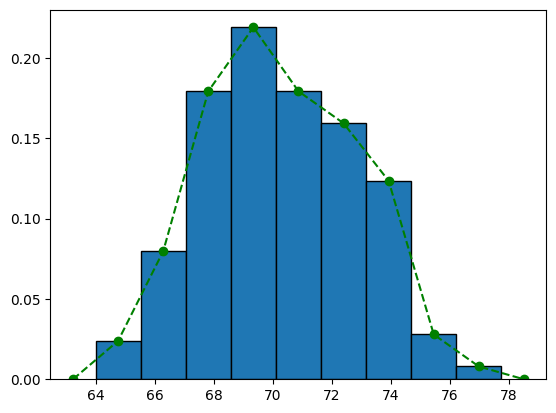

In [14]:
a,bins,_ = plt.hist(X, density=False, edgecolor='black', weights=np.ones_like(X)/len(X),bins=9)
x = np.append([0], a)
x = np.append(x, [0])
width = (X.max() - X.min())/9
bins = np.append([bins[0] - width], bins)
y = bins + width / 2
plt.plot(y, x,'go--')
plt.show()

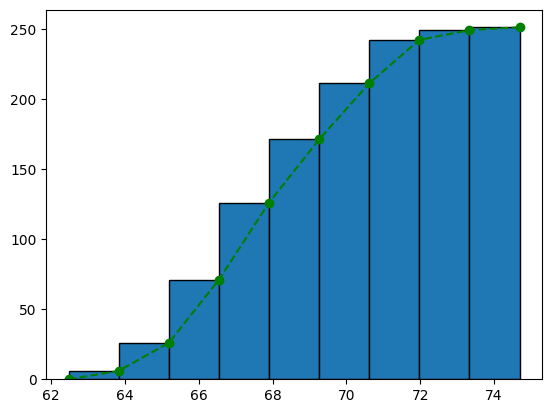

In [15]:
a,bins,_ = plt.hist(bins[:-2], density=False, weights=Xf, edgecolor='black', bins=9)
x = np.append([0], a)
plt.plot(bins, x,'go--')
plt.show()

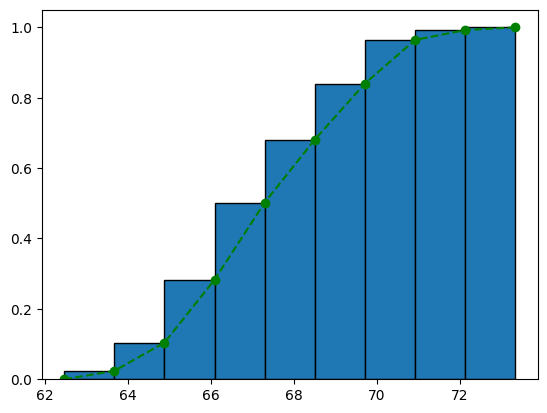

In [16]:
a, bins, _ = plt.hist(bins[:-1], density=False, weights=Xf1, edgecolor='black', bins=9)
x = np.append([0], a)
plt.plot(bins, x, 'go--')
plt.show()

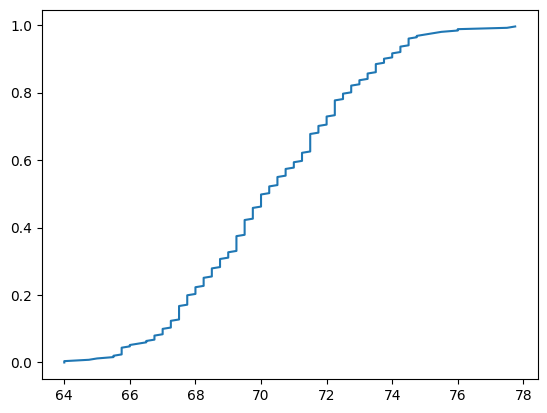

In [17]:
plt.plot(np.sort(X), np.linspace(0, 1, len(X), endpoint=False))

2.1. Доверительные интервалы для мат. ожидания

In [18]:
np.std(X, ddof=1)/np.sqrt(X.shape[0]), stats.sem(X)

(0.16501290333104807, 0.16501290333104807)

In [19]:
stats.t.interval(confidence=0.995, df=len(X)-1,
              loc=np.mean(X),
              scale=stats.sem(X))

(69.8434131091908, 70.77810083503229)

In [20]:
stats.t.interval(confidence=0.975, df=len(X)-1,
              loc=np.mean(X),
              scale=stats.sem(X))

(69.93865562699874, 70.68285831722436)

In [21]:
stats.t.interval(confidence=0.95, df=len(X)-1,
              loc=np.mean(X),
              scale=stats.sem(X))

(69.98576432410741, 70.63574962011569)

2.2. Доверительные интервалы для дисперсии

In [22]:
x, y = np.reciprocal(stats.chi2.interval(confidence=0.995, df=len(X)-1)) * (len(X) - 1) * np.var(X, ddof=1)
y, x

(5.383879099043197, 8.908324935594354)

In [23]:
x, y = np.reciprocal(stats.chi2.interval(confidence=0.975, df=len(X)-1)) * (len(X) - 1) * np.var(X, ddof=1)
y, x

(5.643195682972681, 8.434237148674605)

In [24]:
x, y = np.reciprocal(stats.chi2.interval(confidence=0.95, df=len(X)-1)) * (len(X) - 1) * np.var(X, ddof=1)
y, x

(5.778497356151902, 8.210735391754305)

In [25]:
var1, var2 = sheetX['B16'], sheetX['B18']
X1 = np.array(var1)
X2 = np.array(var2)

2.3. Доверительные интервалы для разности мат. ожиданий

In [26]:
stats.t.interval(confidence=0.995, df=len(X1) + len(X2) - 2,
              loc=(np.mean(X1) - np.mean(X2)),
              scale=np.sqrt(stats.sem(X1) ** 2 + stats.sem(X2) ** 2))

(13.482002506726232, 14.605299080575358)

In [27]:
stats.t.interval(confidence=0.975, df=len(X1) + len(X2) - 2,
              loc=(np.mean(X1) - np.mean(X2)),
              scale=np.sqrt(stats.sem(X1) ** 2 + stats.sem(X2) ** 2))

(13.59581659452813, 14.491484992773458)

In [28]:
stats.t.interval(confidence=0.95, df=len(X1) + len(X2) - 2,
              loc=(np.mean(X1) - np.mean(X2)),
              scale=np.sqrt(stats.sem(X1) ** 2 + stats.sem(X2) ** 2))

(13.65227935955607, 14.435022227745518)

2.4. Доверительные интервалы для отношения дисперсий

In [29]:
stats.f.interval(confidence=0.99, dfn=len(X1) - 1, dfd=len(X2) - 1,
              scale=np.var(X1, ddof=1) / np.var(X2, ddof=1))

(7.557887214167339, 14.512578262793362)

In [30]:
stats.f.interval(confidence=0.95, dfn=len(X1) - 1, dfd=len(X2) - 1,
              scale=np.var(X1, ddof=1) / np.var(X2, ddof=1))

(8.172845894017637, 13.420591935699616)

In [31]:
stats.f.interval(confidence=0.9, dfn=len(X1) - 1, dfd=len(X2) - 1,
              scale=np.var(X1, ddof=1) / np.var(X2, ddof=1))

(8.505945347054121, 12.895031089631445)

3.1. Проверка статистических гипотез о математических ожиданиях

In [32]:
np.mean(X)

70.31075697211155

In [33]:
Z, p_value = stats.ttest_1samp(a=X, popmean=70, axis=0, alternative='two-sided')
Z, p_value

(1.8832283163220824, 0.06083032618563021)

In [34]:
Z, p_value = stats.ttest_1samp(a=X, popmean=71, axis=0, alternative='two-sided')
Z, p_value

(-4.176903829791394, 4.0856584095167825e-05)

In [35]:
Z, p_value = stats.ttest_1samp(a=X, popmean=69, axis=0, alternative='two-sided')
Z, p_value

(7.943360462435559, 6.705515807666838e-14)

3.2. Проверка статистических гипотез о дисперсиях

In [36]:
np.std(X, ddof = 1)

2.614296047639057

In [37]:
def chisquare(dist, m, d, bins=10, ddof=0):
    counts, bins1 = np.histogram(dist, bins=bins)
    normal = (stats.norm.cdf(bins1[1:], m, d) - stats.norm.cdf(bins1[:-1], m, d)) * dist.shape[0]
    Z = np.sum((counts - normal) ** 2 / normal)
    return Z, stats.chi2.cdf(Z, bins - 1 - ddof)

In [38]:
def chisquare1(dist, d, d0, ddof=1):
    Zc = ((len(dist) - 1) * d / d0 ** 2)
    p_value = 2 * (1 - stats.chi2.cdf(Zc, len(dist) - ddof))
    if p_value > 1:
        p_value = 2 - p_value
    return Zc, p_value

In [39]:
d1 = np.var(X, ddof=1)
d1

6.834543824701195

In [40]:
Z1, p1 = chisquare1(X, d1, 2.6)
Z2, p2 = chisquare1(X, d1, 2)
Z3, p3 = chisquare1(X, d1, 3)
Z1, Z2, Z3

(252.75679825078382, 427.1589890438247, 189.8484395750332)

In [41]:
p1, p2, p3

(0.8786899345020438, 4.0101699738670504e-11, 0.003593107170663856)

3.3. Проверка статистических гипотез о равенстве математических ожиданий

In [42]:
m1 = np.mean(X1)
m2 = np.mean(X2)
m1, m2

(32.2734126984127, 18.229761904761904)

In [43]:
Z, p_value = stats.ttest_ind(X1, X2, alternative='two-sided')
Z, p_value

(70.49970993245685, 1.4790343473341948e-262)

In [44]:
#!pip install pingouin
pg.ttest(X1, X2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,70.49971,502,two-sided,1.479034e-262,"[13.65, 14.44]",6.280613,1.051e+258,1.0


3.4. Проверка статистических гипотез о равенстве дисперсий

In [45]:
def var(dist, m):
    return np.sum((dist - m) ** 2) / dist.shape[0]
def std(dist, m):
    return np.sqrt(var(dist, m))

In [46]:
v1 = np.var(X1, ddof=1)
v2 = np.var(X2, ddof=1)
v1, v2

(9.12809507999747, 0.8715808195788275)

In [47]:
def f_test(dist1, dist2, m1, m2, ddof=0):
    d1, d2 = var(dist1, m1), var(dist2, m2)
    f = d1 / d2
    n1, n2 = dist1.shape[0] - ddof, dist2.shape[0] - ddof
    return f, stats.f.cdf(f, n1, n2)

In [48]:
Z, p_value = f_test(X1, X2, m1, m2, ddof=1)
p_value = 1 - p_value
Z, p_value

(10.473033452489721, 1.1102230246251565e-16)

4.1. Критерий хи-квадрат

In [49]:
plt.style.use('ggplot')

In [50]:
n = 251
bins_number = 9
h = (max(X) - min(X)) / bins_number   #ширина
bins_number, h, max(X), min(X)

(9, 1.5277777777777777, 77.75, 64.0)

In [51]:
hist, bin_edges = np.histogram(X, bins=bins_number)
bin_edges

array([64.        , 65.52777778, 67.05555556, 68.58333333, 70.11111111,
       71.63888889, 73.16666667, 74.69444444, 76.22222222, 77.75      ])

In [52]:
freq,division = np.histogram(X, bins=bins_number)
for i in range(len(freq)):
    print(freq[i], round(freq[i]/len(X), 3))

6 0.024
20 0.08
45 0.179
55 0.219
45 0.179
40 0.159
31 0.124
7 0.028
2 0.008


In [53]:
count,division = np.histogram(X, bins=bins_number)
m = np.mean(X)
d = np.var(X, ddof = 1)
s = np.std(X, ddof = 1)
p_H_true = []
for i in range(1, len(division)):
  p = stats.norm(loc=m, scale=s).cdf(division[i]) - stats.norm(loc=m, scale=s).cdf(division[i-1])
  p_H_true.append(p)

p_H_true

[0.025768299670026897,
 0.07287875348559206,
 0.14784539246613998,
 0.2151806247461684,
 0.22471907895554283,
 0.1683931125908107,
 0.09053477662066434,
 0.03491624499171553,
 0.009656826229297866]

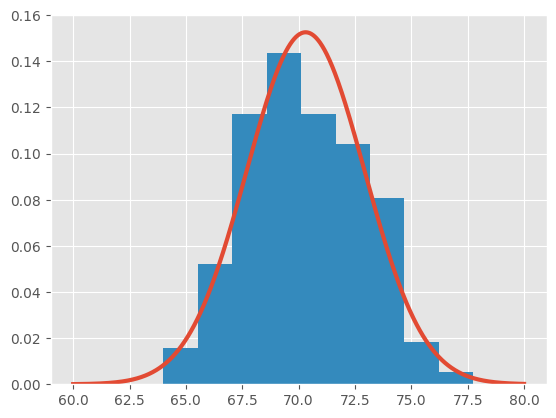

In [54]:
x = np.linspace(60, 80, 1000)
norm_rv = stats.norm(loc=m, scale=s)
pdf = norm_rv.pdf(x)

# плотность
plt.plot(x, pdf, lw=3)

plt.hist(X, bins=bins_number, density=True);
plt.show()

In [55]:
def chisquare_normal(dist, m, d, bins, ddof=2):
    counts, bins1 = np.histogram(dist, bins=bins)
    normal = (stats.norm.cdf(bins1[1:], m, d) - stats.norm.cdf(bins1[:-1], m, d)) * dist.shape[0]
    Z = np.sum((counts - normal) ** 2 / normal)
    return Z, 1 - stats.chi2.cdf(Z, bins - ddof - 1)

In [56]:
chisquare_normal(X, m, s, bins_number)

(7.759732436440803, 0.2562397142951771)

4.2. Проверка гипотезы о нормальности на основе коэффициента асимметрии и эксцесса (критерий Харке-Бера)

In [57]:
stats.jarque_bera(X)

SignificanceResult(statistic=2.3240554528209163, pvalue=0.312851160715481)

5.1 Критерий знаков

In [58]:
stats.wilcoxon(X1, X2)

WilcoxonResult(statistic=0.0, pvalue=4.339533508128513e-43)

5.2. Критерий хи-квадрат

In [59]:
def two_sample_chisquare(dist1, dist2, bins=bins_number):
    bins1, counts1 = np.histogram(dist1, bins=bins)
    bins2, counts2 = np.histogram(dist2, bins=bins)
    Z = np.sum((counts1 - counts2) ** 2 / counts1)
    return Z, 1 - stats.chi2.cdf(Z, 2)

In [60]:
two_sample_chisquare(X1, X2)

(76.95849158102968, 0.0)

In [61]:
var1, var2 = sheetX['B16'], sheetX['B18']
X1 = np.array(var1)
X2 = np.array(var2)

In [62]:
min(X1), max(X1), min(X2), max(X2)

(24.8, 45.0, 15.8, 21.4)

In [63]:
(max(X1) - min(X2))/9

3.2444444444444445

In [64]:
stored1 = []
freq1,division1 = np.histogram(X1, bins=bins_number)
for i in range(len(freq1)):
    stored1.append(freq1[i]/len(X1))
    print(freq1[i], round(freq1[i]/len(X1), 3))
division1

10 0.04
26 0.103
72 0.286
70 0.278
44 0.175
25 0.099
4 0.016
0 0.0
1 0.004


array([24.8       , 27.04444444, 29.28888889, 31.53333333, 33.77777778,
       36.02222222, 38.26666667, 40.51111111, 42.75555556, 45.        ])

In [65]:
stored2 = []
freq2,division2 = np.histogram(X2, bins=bins_number)
for i in range(len(freq2)):
    stored2.append(freq2[i]/len(X2))
    print(freq2[i], round(freq2[i]/len(X2), 3))
division2

3 0.012
24 0.095
42 0.167
55 0.218
76 0.302
33 0.131
14 0.056
2 0.008
3 0.012


array([15.8       , 16.42222222, 17.04444444, 17.66666667, 18.28888889,
       18.91111111, 19.53333333, 20.15555556, 20.77777778, 21.4       ])

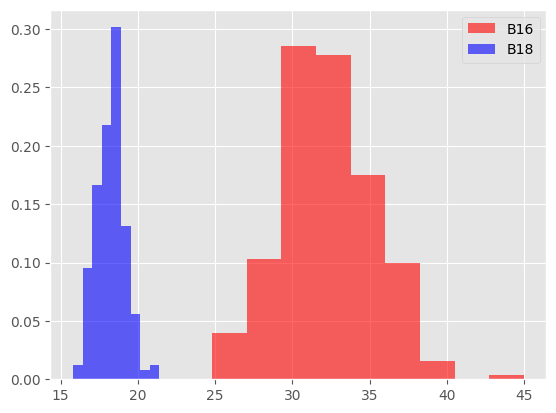

In [66]:
X3, bins3 = np.histogram(X1, bins=bins_number)
plt.stairs(X3 / len(X1), edges=bins3, fill=True, color='red', alpha=0.6, label="B16")
X4, bins4 = np.histogram(X2, bins=bins_number)
plt.stairs(X4 / len(X2), edges=bins4, fill=True, color='blue', alpha=0.6, label="B18")
plt.legend()
plt.show()

In [67]:
X2 = np.append(X2, X1.max())

In [68]:
X1 = np.append(X1, X2.min())

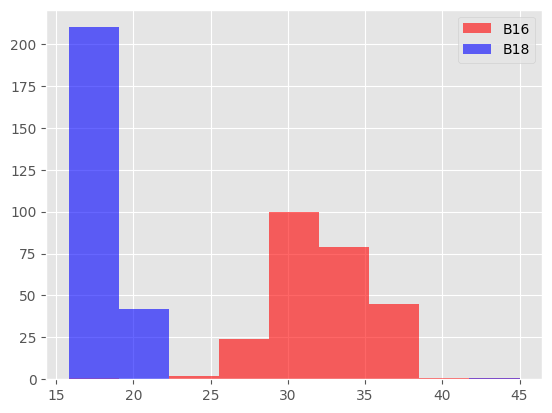

In [69]:
_, bins3 = np.histogram(np.concatenate([X1, X2]), bins=9)
freq1, _, _  = plt.hist(X1, bins=bins3, fill=True, color='red', alpha=0.6, label="B16")
freq2, _, _ = plt.hist(X2, bins=bins3, fill=True, color='blue', alpha=0.6, label="B18")
plt.legend()
plt.show()

In [70]:
freq1, freq2

(array([  1.,   0.,   2.,  24., 100.,  79.,  45.,   1.,   1.]),
 array([210.,  42.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]))

In [71]:
acc1 = freq1/len(X1)
acc2 = freq2/len(X2)
acc1, acc2

(array([0.00395257, 0.        , 0.00790514, 0.09486166, 0.39525692,
        0.31225296, 0.17786561, 0.00395257, 0.00395257]),
 array([0.83003953, 0.16600791, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00395257]))

In [72]:
data = {
    'Номер интервала': list(range(len(bins3) - 1)),
    'Нижняя граница': bins3[:-1],
    'Верхняя граница': bins3[1:],
    'Частота признака 1': freq1,
    'Частота признака 2': freq2,
    'Относит. частота признака 1': acc1,
    'Относит. частота признака 2': acc2
}
df = pd.DataFrame(data)
df.to_excel('bdz3.xlsx')

6. Таблицы сопряжённости

In [73]:
df = pd.read_excel("/content/drive/MyDrive/МАТ СТАТ/БДЗ/table.xls", sheet_name="B - bodyfat")

In [74]:
confusion_mx = pd.crosstab(df.B3, df.B6)
confusion_mx

B6,Arlington,Norwood,Revere,Somerville
B3,,,,
high,39,20,39,22
low,8,4,11,16
normal,26,17,32,18


In [75]:
#теоретическая таблица
arr = confusion_mx.to_numpy()

k = len(arr)
l = len(arr[0])

n = 0
for i in range(0, len(arr)):
  for j in range(0, len(arr[i])):
    n += arr[i][j]

m = []

for i in range(0, len(arr)):
  m_line = []
  for j in range(0, len(arr[i])):

    x1 = 0
    for i1 in range(0, len(arr[i])):
      x1 += arr[i][i1]
    x2 = 0
    for i2 in range(0, len(arr)):
      x2 += arr[i2][j]

    m_line.append((x1*x2)/n)
  m.append(m_line)

print("Tеоретическая таблица:")
m

Tеоретическая таблица:


[[34.76190476190476,
  19.523809523809526,
  39.04761904761905,
  26.666666666666668],
 [11.297619047619047, 6.345238095238095, 12.69047619047619, 8.666666666666666],
 [26.94047619047619,
  15.130952380952381,
  30.261904761904763,
  20.666666666666668]]

In [76]:
# Проверить статистические гипотезы
z = 0

for i in range(0, len(arr)):
  for j in range(0, len(arr[i])):
    z += ((arr[i][j] - m[i][j])**2) / m[i][j]

f_z_chi =  stats.chi2((k-1)*(l-1)).cdf(z)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

critical_point = stats.chi2((k-1)*(l-1)).ppf(0.95)

print("Test: z = %.3f; p-value = %.3f" % (z, p_value))
print(critical_point)

Test: z = 10.312; p-value = 0.224
12.591587243743977


In [77]:
stats.chi2_contingency(confusion_mx)

Chi2ContingencyResult(statistic=10.312314424310156, pvalue=0.11210105088453722, dof=6, expected_freq=array([[34.76190476, 19.52380952, 39.04761905, 26.66666667],
       [11.29761905,  6.3452381 , 12.69047619,  8.66666667],
       [26.94047619, 15.13095238, 30.26190476, 20.66666667]]))

7. Дисперсионный анализ



In [78]:
X = pd.read_excel(open('/content/drive/MyDrive/МАТ СТАТ/БДЗ/table.xls', 'rb'), sheet_name='B - bodyfat')['B3'].to_numpy()
Y = pd.read_excel(open('/content/drive/MyDrive/МАТ СТАТ/БДЗ/table.xls', 'rb'), sheet_name='B - bodyfat')['B8'].to_numpy()

In [79]:
data = {'high': [], 'low': [], 'normal': []}
for i in range(len(X)):
    if X[i] == 'high':
        data["high"].append(Y[i])
    elif X[i] == 'low':
        data["low"].append(Y[i])
    elif X[i] == 'normal':
        data["normal"].append(Y[i])

In [80]:
groups = []
for key in data:
    arr = np.array(data[key])
    groups.append(arr)
    print(f"Объем выборки {key}:",  len(data[key]))
    print(f"Cреднее {key}: {round(arr.mean(), 2)}")
    print(f"Дисперсия {key}: {round(arr.var(ddof=1), 2)}")

Объем выборки high: 120
Cреднее high: 69.99
Дисперсия high: 19.98
Объем выборки low: 39
Cреднее low: 70.43
Дисперсия low: 7.58
Объем выборки normal: 93
Cреднее normal: 70.23
Дисперсия normal: 7.56


In [81]:
(sum(groups[0]) + sum(groups[1]) + sum(groups[2]))/len(X)

70.14880952380952

In [82]:
K = 3
s = 0
n = len(X)
mean = (sum(groups[0]) + sum(groups[1]) + sum(groups[2]))/n

data = [groups[0], groups[1], groups[2]]

for ar in data:
  for x in ar:
    s += (x - mean)**2
D_x = s/n

#внутригрупповая дисперсиея
s = 0
for ar in data:
  s = s + len(ar) * np.var(ar)
D_w = s/n

#межгрупповая дисперсия
s = 0
for ar in data:
  s = s + len(ar) * (np.mean(ar) - mean)**2
D_b = s/n

print("D_b = %.3f" % D_b)
print("D_w = %.3f" % D_w)
print("D_x = %.3f" % D_x)
print('Число степеней свободы: {dof}'.format(dof = K-1))
print(f'Несмещенная оценка групировочного признака: {(D_b * n)/(K - 1)}')
print('Число степеней свободы: {dof}'.format(dof = n-K))
print(f'Несмещенная оценка остаточного признака {(D_w * n)/(n - K)}')
print('Число степеней свободы: {dof}'.format(dof = n-1))
print(f'Несмещенная оценка всех признаков: {(D_x * n)/(n - 1)}')

D_b = 0.026
D_w = 13.337
D_x = 13.363
Число степеней свободы: 2
Несмещенная оценка групировочного признака: 3.2943353605399457
Число степеней свободы: 249
Несмещенная оценка остаточного признака 13.497815149140813
Число степеней свободы: 251
Несмещенная оценка всех признаков: 13.416512521343193


In [83]:
math.isclose(D_b + D_w, D_x)

True

In [84]:
D_b+D_w

13.363272392290247

In [85]:
eta_squared = D_b / D_x
eta = eta_squared ** (1/2)
print("Эмпирический коэффициент детерминации: %.3f" % eta_squared)
print("Эмпирическое корреляционное отношение: %.3f" % eta)

Эмпирический коэффициент детерминации: 0.002
Эмпирическое корреляционное отношение: 0.044


In [86]:
stats.f_oneway(*groups)

F_onewayResult(statistic=0.24406434109076486, pvalue=0.7836244221759121)

8.1. Расчёт парных коэффициентов корреляции

In [87]:
xls = pd.ExcelFile(r'/content/drive/MyDrive/МАТ СТАТ/БДЗ/table.xls')
df = xls.parse(2)

In [88]:
X = df.B16.to_numpy()
Y = df.B18.to_numpy()

In [89]:
X.shape

(252,)

In [90]:
coef, p = stats.pearsonr(X, Y)
print('Pirson correlation coefficient: %.3f' % coef)
print('Pirson p-value: %.3f' % p)

coef, p = stats.spearmanr(X, Y)
print('Spearmans correlation coefficient: %.3f' % coef)
print('Spearmans p-value: %.3f' % p)

coef, p = stats.kendalltau(X, Y)
print('Kendall correlation coefficient: %.3f' % coef)
print('Kendall p-value: %.3f' % p)

Pirson correlation coefficient: 0.632
Pirson p-value: 0.000
Spearmans correlation coefficient: 0.602
Spearmans p-value: 0.000
Kendall correlation coefficient: 0.436
Kendall p-value: 0.000


In [91]:
stats.pearsonr(X, Y)

PearsonRResult(statistic=0.632126423319681, pvalue=1.6059360743850726e-29)

In [92]:
stats.spearmanr(X, Y)

SignificanceResult(statistic=0.601755150470212, pvalue=3.2615046528869524e-26)

In [93]:
stats.kendalltau(X, Y)

SignificanceResult(statistic=0.4359483013631599, pvalue=5.444522153907486e-24)

In [94]:
std1 = X.std()
std2 = Y.std()
mean1 = X.mean()
mean2 = Y.mean()
n = X.shape[0]

r, _ = stats.pearsonr(X, Y)

for alpha in [0.01, 0.05, 0.1]:
    print(f'{alpha = }')
    quantile = stats.norm(loc=0, scale=1).ppf(1 - (alpha / 2))

    a = r + (r * (1 - r ** 2) / (2 * n)) - ((1 - r ** 2) / n ** (1 / 2)) * quantile
    b = r + (r * (1 - r ** 2) / (2 * n)) + ((1 - r ** 2) / n ** (1 / 2)) * quantile
    print(f'lower: {a}')
    print(f'higher: {b}')
    print()

alpha = 0.01
lower: 0.5354547492368562
higher: 0.7303042042893713

alpha = 0.05
lower: 0.5587484165674677
higher: 0.7070105369587598

alpha = 0.1
lower: 0.570666729899206
higher: 0.6950922236270215



In [95]:
dof = n - 2  # degrees of freedom

r, _ = stats.pearsonr(X, Y)

# rs can have elements equal to 1, so avoid zero division warnings

# clip the small negative values possibly caused by rounding
# errors before taking the square root
z = r * np.sqrt(dof / (1 - r ** 2))
f_z = stats.t(n - 2).cdf(z)
p_value = 2 * min(f_z, 1 - f_z)

z, p_value

(12.898753803447342, 0.0)

In [96]:
dof = n - 2  # degrees of freedom

r, _ = stats.spearmanr(X, Y)

# rs can have elements equal to 1, so avoid zero division warnings
with np.errstate(divide='ignore'):
    # clip the small negative values possibly caused by rounding
    # errors before taking the square root
    z = r * np.sqrt((dof / (1 - r ** 2)))
    f_z = stats.t(n - 2).cdf(z)
    p_value = 2 * min(f_z, 1 - f_z)

z, p_value

(11.912877390816847, 0.0)

In [97]:
r, _ = stats.kendalltau(X, Y)

z = r * np.sqrt((9 * n * (n + 1)) / (2 * (2 * n + 5)))
f_z = stats.norm(loc=0, scale=1).cdf(z)
p_value = 2 * min(f_z, 1 - f_z)

z, p_value

(10.350060454549068, 0.0)

8.2. Расчёт множественных коэффициентов корреляции

In [98]:
X1 = df.B8.to_numpy()
X2 = df.B10.to_numpy()
X3 = df.B3.to_numpy()

In [99]:
data = {
    'X1': X1,
    'X2': X2,
    'X3': X3
}
data = pd.DataFrame(data)
data

,X1,X2,X3
0,67.75,93.1,normal
1,72.25,93.6,low
2,66.25,95.8,high
3,72.25,101.8,normal
4,71.25,97.3,high
...,...,...,...
247,67.00,89.2,normal
248,69.75,108.5,high
249,66.00,111.1,high
250,70.50,108.3,high


In [100]:
# матрица ранговых коэффициентов корреляции по Кендаллу
# матрица значений p-value для ранговых коэффициентов корреляции по Кендаллу

sample = [X1, X2, X3]
arr_kendall = []
arr_kendall_pvalue = []

for i in range(0, 3):
    row = []
    row_p = []
    for j in range(0, 3):
        if i != j:
            t = stats.kendalltau(sample[i], sample[j])
            row.append(t[0])
            row_p.append(t[1])
        else:
            t = stats.kendalltau(sample[i], sample[j])
            row.append(t[0])
            row_p.append(0.0)
    arr_kendall.append(row)
    arr_kendall_pvalue.append(row_p)

arr_kendall_pvalue

[[0.0, 3.257130126763669e-05, 0.6522542434823628],
 [3.257130126763669e-05, 0.0, 1.2375663290980087e-11],
 [0.6522542434823628, 1.2375663290980087e-11, 0.0]]

In [101]:
arr_kendall

[[1.0, 0.17819465209210375, -0.022496447979978892],
 [0.17819465209210375, 0.9999999999999999, -0.3346630390002393],
 [-0.022496447979978892, -0.33466303900023925, 1.0]]

In [102]:
corr = data.corr('kendall')
corr

<ipython-input-102-788571c2f35e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr('kendall')


,X1,X2
X1,1.000000,0.178195
X2,0.178195,1.000000


<Axes: >

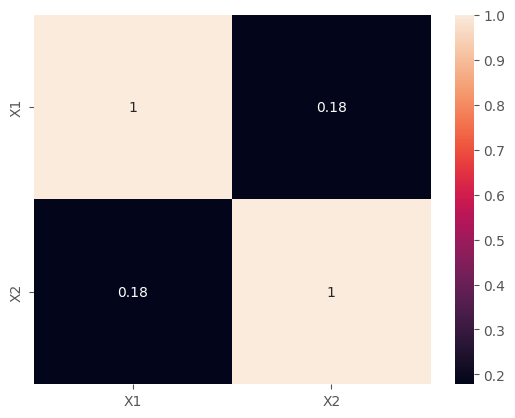

In [103]:
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="rocket",
           annot=True)

In [104]:
def kend_p(r):
    z1 = r * np.sqrt((9 * n * (n + 1)) / (2 * (2 * n + 5)))
    f_z1 = stats.norm(loc=0, scale=1).cdf(z1)
    p_value1 = 2 * min(f_z1, 1 - f_z1)
    return p_value1

In [105]:
p_vs = corr.applymap(kend_p)
p_vs

,X1,X2
X1,0.000000,0.000023
X2,0.000023,0.000000


<Axes: >

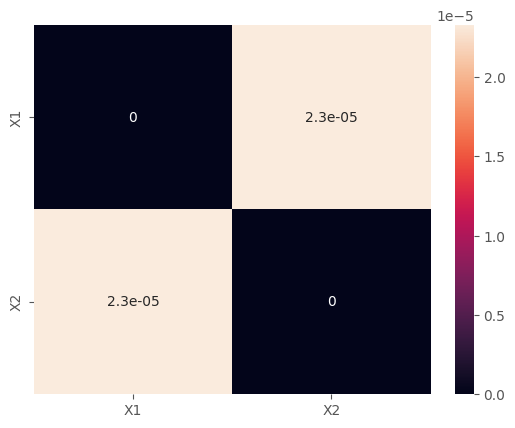

In [106]:
sns.heatmap(p_vs,
           xticklabels=p_vs.columns.values,
           yticklabels=p_vs.columns.values,
           cmap="rocket",
           annot=True)

In [107]:
stats.kendalltau(X1, X2, method='auto')

SignificanceResult(statistic=0.17819465209210375, pvalue=3.257130126763669e-05)

In [108]:
import warnings


def compute_w(data):
    assert isinstance(data, list), "You must pass a python list,\
        {} found".format(type(data))
    assert all(isinstance(x, list) for x in data), "You must pass a list of\
        python lists as input."  # To test
    assert all(isinstance(x[y], int) for x in data for y in range(len(x))), "You must\
        pass a list of lists of integers."  # To test

    # Number of annotators
    m = len(data[0])
    # Tests
    if not all(len(i) == m for i in data):
        raise ValueError("Items must all have the same number of annotators.\
            At least one sublist of argument 'data' has different length than\
            the first sublist.")
    if m <= 1:
        raise ValueError("Kendall's W is irrevelent for only one annotator,\
            try adding more lists to argument 'data'.")
    if m == 2:
        warnings.warn("Kendall's W is adapted to measure agreement between\
            more than two annotators. The results might not be reliable in\
            this case.", Warning)

    # Number of items
    n = len(data)
    # Tests
    if n <= 1:
        raise ValueError("Kendall's W is irrevelent for only one item,\
            try adding more sublists to argument 'data'.")

    # Sum of each item ranks
    sums = [sum(x) for x in data]
    # Mean of ranking sums
    Rbar = sum(sums) / n
    # Sum of squared deviations from the mean
    S = sum([(sums[x] - Rbar) ** 2 for x in range(n)])

    W = (12 * S) / (m ** 2 * (n ** 3 - n))

    return W

In [109]:
s1 = pd.Series(X1)
s2 = pd.Series(X2)
s3 = pd.Series(X3)

r1 = s1.rank()
r2 = s2.rank()
r3 = s3.rank()

r = [r1, r2, r3]

k = 3  #число выборок

w = 0
for i in range(0, n):
    s1 = 0
    for j in range(0, k):
        s1 += (1 / k) * r[j][i]
    w += (s1 - (n + 1) / 2) ** 2

w = (w * 12) / (n ** 3 - n)

print('Коэффициент конкордации: %.3f' % w)

#статистика критерия

z = k * (n - 1) * w
f_z = stats.chi2(n - 1).cdf(z)
p_value = 2 * min(f_z, 1 - f_z)

print("test: z = %.3f; p-value = %.3f" % (z, p_value))

Коэффициент конкордации: 0.277
test: z = 208.624; p-value = 0.048


In [110]:
s1 = pd.Series(X1)
s2 = pd.Series(X2)
s3 = pd.Series(X3)

r1 = s1.rank()
r2 = s2.rank()
r3 = s3.rank()

r = np.concatenate([r1.to_numpy(), r2.to_numpy(), r3.to_numpy()]).reshape((3, r1.shape[0]))

k = 3  # число выборок

w = np.sum(((1 / k) * np.sum(r, axis=0) - (n + 1) / 2) ** 2)

w = (w * 12) / (n ** 3 - n)

print(f'Коэффициент конкордации: {w:.3f}')

# статистика критерия

z = k * (n - 1) * w
f_z = stats.chi2(n - 1).cdf(z)
p_value = 2 * min(f_z, 1 - f_z)

z, p_value

Коэффициент конкордации: 0.277


(208.62428634167762, 0.04776548641538236)

In [111]:
w

0.2770574851815108

9.1.1. Точечные оценки линейной регрессионной модели

In [112]:
X = df.B10.to_numpy()
Y = df.B2.to_numpy()

In [113]:
def f(x):
    return beta_1 * x + beta_0

In [114]:
r, _ = stats.pearsonr(X, Y)
s1 = np.std(X, ddof=1)
s2 = np.std(Y, ddof=1)
r, s1, s2

(0.7026203388938644, 8.43047553192002, 8.368740413029707)

In [115]:
beta_0 = np.mean(Y) - r * (s2/s1) * np.mean(X)

In [116]:
beta_1 = r * (s2/s1)

In [117]:
beta_0, beta_1

(-51.17158526171901, 0.6974751546166394)

In [118]:
data = {
    'X': X,
    'Y': f(X)
}
df1 = pd.DataFrame(data)
df1

,X,Y
0,93.1,13.763352
1,93.6,14.112089
2,95.8,15.646535
3,101.8,19.831385
4,97.3,16.692747
...,...,...
247,89.2,11.043199
248,108.5,24.504469
249,111.1,26.317904
250,108.3,24.364974


In [119]:
X_grp = df1.groupby('X')
X_grp

In [120]:
len(X), len(X_grp)

(252, 174)

In [121]:
n = len(Y)
D_YX = np.sum(X_grp.count().to_numpy() * (X_grp.mean().to_numpy() - np.mean(Y)) ** 2) * 1 / n
D_YX

34.43775316576683

In [122]:
D_res = np.var(Y)
D_res

69.75789619551523

In [123]:
D_resY = np.sum((Y - f(X)) ** 2) / n

# D_resY = np.mean((Y - f(X)) ** 2)
D_resY

35.32014302974842

In [124]:
print(f"{D_YX = }")
print(f"{D_resY = }")
print(f"{D_res = }")
print(f"{D_YX + D_resY = }")

D_YX = 34.43775316576683
D_resY = 35.32014302974842
D_res = 69.75789619551523
D_YX + D_resY = 69.75789619551526


In [137]:
(252/251)*D_res

70.03581610067664

In [125]:
print("Коэффициент детерминации: ", D_YX/D_res)
print("Кореляционное отношение: ", np.sqrt(D_YX/D_res))

Коэффициент детерминации:  0.4936753406273289
Кореляционное отношение:  0.7026203388938644


In [126]:
D_Y = D_res
R_YX = D_YX / D_Y
R_YX

0.4936753406273289

In [127]:
new_D_res = np.sum((Y - f(X)) ** 2) / (n - 2)

X_sum = 0
for i in range(len(X)):
    X_sum += (X[i])**2
alpha = [0.01, 0.05, 0.1]
for a in alpha:
    beta_0_lower = beta_0 - stats.t(n-2).ppf(1-a/2)*math.sqrt(new_D_res * X_sum / (n**2 * X.var()))
    beta_0_upper = beta_0 + stats.t(n-2).ppf(1-a/2)*math.sqrt(new_D_res * X_sum / (n**2 * X.var()))
    beta_1_lower = beta_1 - stats.t(n-2).ppf(1-a/2)*math.sqrt(new_D_res / (n**2 * X.var()))
    beta_1_upper = beta_1 + stats.t(n-2).ppf(1-a/2)*math.sqrt(new_D_res / (n**2 * X.var()))
    print(f"Степнь уверенности: {a}")
    print(f"Нижняя граница b0: {round(beta_0_lower, 3)}")
    print(f"Верхняя граница b0: {round(beta_0_upper, 3)}")
    print(f"Нижняя граница b1: {round(beta_1_lower, 3)}")
    print(f"Верхняя граница b1: {round(beta_1_upper, 3)}")

Степнь уверенности: 0.01
Нижняя граница b0: -62.903
Верхняя граница b0: -39.44
Нижняя граница b1: 0.69
Верхняя граница b1: 0.705
Степнь уверенности: 0.05
Нижняя граница b0: -60.073
Верхняя граница b0: -42.27
Нижняя граница b1: 0.692
Верхняя граница b1: 0.703
Степнь уверенности: 0.1
Нижняя граница b0: -58.634
Верхняя граница b0: -43.709
Нижняя граница b1: 0.693
Верхняя граница b1: 0.702


9.1.2. Интервальные оценки линейной регрессионной модели

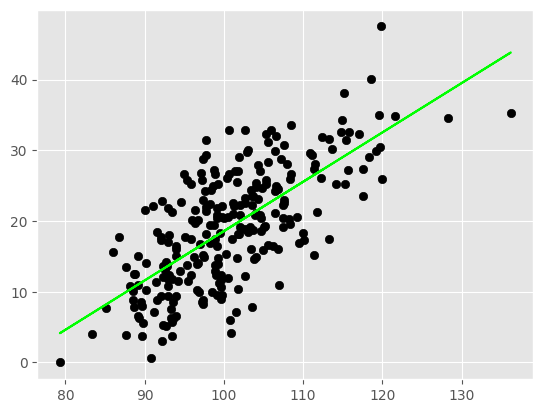

In [128]:
plt.scatter(X, Y, color = 'black')
lin_reg = beta_1 * X + beta_0
plt.plot(X, lin_reg, color='lime')

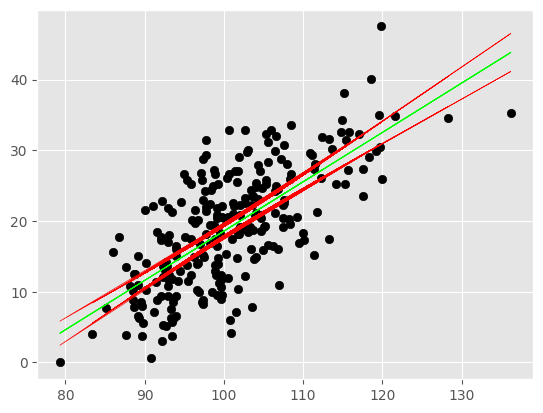

In [129]:
X_sum = 0
quantile = stats.t(n-2).ppf(1- 0.1/2)

for i in range(len(X)):
    X_sum += (X[i])**2
flow = []
fhigh = []

for i in range(n):
    flow.append(f(X[i]) - quantile * np.sqrt(new_D_res * (1 / n + (X[i] - X.mean()) ** 2 / (n * X.var()))))
    fhigh.append(f(X[i]) + quantile * np.sqrt(new_D_res * (1 / n + (X[i] - X.mean()) ** 2 / (n * X.var()))))
plt.scatter(X, Y, color='black')
lin_reg = beta_1*X + beta_0

plt.plot(X, lin_reg, color='lime', linewidth = 0.8)
plt.plot(X, fhigh, linestyle = '-',color='red', linewidth = 0.5)
plt.plot(X, flow, linestyle = '-', color='red', linewidth = 0.5)

-5.257510869125912

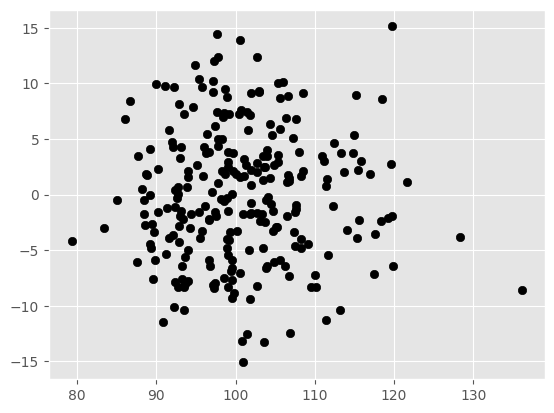

In [130]:
from sklearn.linear_model import LinearRegression

plt.scatter(X, Y - f(X), color='black')
model = LinearRegression()
model.fit(X.reshape((-1, 1)), Y - f(X))
model.score(X.reshape((-1, 1)), Y)

9.1.3. Проверка значимости линейной регрессионной модели

In [131]:
z = R_YX / ((1 - R_YX ) / (n - 2))
print(f'Sign test: z = {z}, p-value = {1 - stats.f(1, n - 2).cdf(z)}')

Sign test: z = 243.75434392183539, p-value = 1.1102230246251565e-16


In [132]:
z = D_YX / (D_resY / (n - 2))
print(f'Sign test: z = {z}, p-value = {1 - stats.f(1, n - 2).cdf(z)}')

Sign test: z = 243.7543439218352, p-value = 1.1102230246251565e-16


9.2.1. Точечные оценки линейной регрессионной модели

In [138]:
X = df.B10.to_numpy()
Y = df.B2.to_numpy()

In [139]:
F = np.array([np.array([1]*len(X)), X, X ** 2]).transpose()
dF = np.dot(F.transpose(), F)
result = np.dot(np.linalg.inv(dF), F.transpose()).dot(Y)
beta_0 = result[0]
beta_1 = result[1]
beta_2 = result[2]
print(f"beta0 = {result[0]} \nbeta1 = {result[1]} \nbeta2 = {result[2]}")

beta0 = -102.65419401207537 
beta1 = 1.6979810700685949 
beta2 = -0.004825234780709209


In [140]:
def f(x):
    return beta_0 + beta_1 * x + beta_2 * x ** 2

In [141]:
data = {
    'X': X,
    'Y': f(X)
}
df1 = pd.DataFrame(data)

In [142]:
X_grp = df1.groupby('X')

In [143]:
len(X), len(X_grp)

(252, 174)

In [146]:
n = len(Y)
D_YX = np.sum(X_grp.count().to_numpy() * (X_grp.mean().to_numpy() - np.mean(Y)) ** 2) * 1 / n
D_resY = np.sum((Y - f(X)) ** 2) / n
D_res = np.var(Y)

In [147]:
print(f"{D_YX = }")
print(f"{D_resY = }")
print(f"{D_res = }")
print(f"{D_YX + D_resY = }")

D_YX = 34.72771031337738
D_resY = 35.03018588220264
D_res = 69.75789619551523
D_YX + D_resY = 69.75789619558002


In [150]:
(252/250)*D_res

70.31595936507935

In [154]:
RXY = D_YX/D_res
RXY, sqrt(RXY)

(0.497831961790299, 0.7055720812151647)

<ipython-input-155-b0926bb18220>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_arr = np.array([1, X1, X1 ** 2])


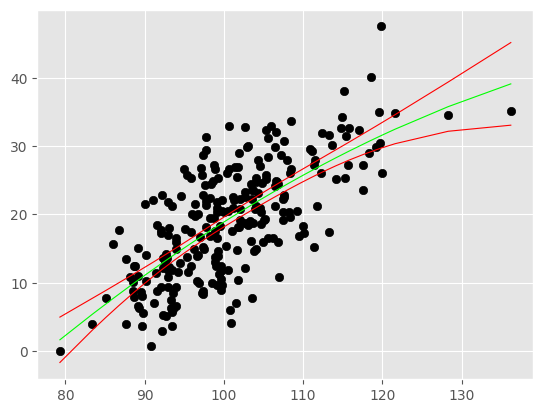

In [155]:
X1 = np.sort(X)
new_D_res = np.sum((Y - f(X)) ** 2) / (n - 2)
quantile = stats.t(n - 3).ppf(1- 0.1/2)

x_arr = np.array([1, X1, X1 ** 2])
flow = f(X1) - quantile * np.sqrt(new_D_res * x_arr.transpose() @ np.linalg.inv(dF) @ x_arr)
fhigh = f(X1) + quantile * np.sqrt(new_D_res * x_arr.transpose() @ np.linalg.inv(dF) @ x_arr)

plt.scatter(X, Y, color='black')
plt.plot(X1, f(X1), color='lime', linewidth = 0.8)
plt.plot(X1, fhigh, linestyle = '-',color='red', linewidth = 0.8)
plt.plot(X1, flow, linestyle = '-', color='red', linewidth = 0.8)

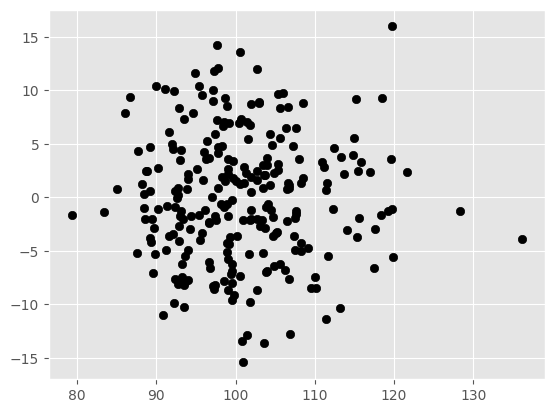

In [156]:
remainses = Y - (f(X))
plt.scatter(X, remainses, color='black')

In [157]:
z = (D_YX * (n - 3)) / (2 * D_resY)
print(f'Sign test: z = {round(z, 3)}, p-value = {1 - stats.f(2, n-3).cdf(z)}')

Sign test: z = 123.425, p-value = 1.1102230246251565e-16


9.3 Множественная линейная регрессионная модель

In [158]:
X1 = df.B10.to_numpy()
X2 = df.B7.to_numpy()
Y = df.B2.to_numpy()

In [159]:
F = np.array([np.array([1]*len(X1)), X1, X2]).transpose()
dF = np.dot(F.transpose(), F)
result = np.dot(np.linalg.inv(dF), F.transpose()).dot(Y)
beta_0 = result[0]
beta_1 = result[1]
beta_2 = result[2]
print(f"beta0 = {result[0]} \nbeta1 = {result[1]} \nbeta2 = {result[2]}")

beta0 = -54.22230011235409 
beta1 = 0.7677273422522142 
beta2 = -0.022536926795339383


In [160]:
def f(x1, x2):
    return beta_0 + beta_1 * x1 + beta_2 * x2

In [161]:
n = len(X1)

D_res = np.sum((Y - f(X1, X2)) ** 2) / n

D_YX = np.sum((f(X1, X2) - np.mean(Y)) ** 2) / n

D_Y = np.var(Y)

print(f"Факторный признак: {D_YX:.2f}")
print(f"Остаточные признаки: {D_res:.2f}")
print(f"Все признаки: {D_Y:.2f}")
print(f"Проверка суммы: {D_YX + D_res:.2f}")

Факторный признак: 34.53
Остаточные признаки: 35.23
Все признаки: 69.76
Проверка суммы: 69.76


In [164]:
(252/250)*D_Y

70.31595936507935

In [165]:
R_YX2 = D_YX / D_Y
R_YX2, np.sqrt(R_YX2)

(0.4949307685740453, 0.7035131616210497)

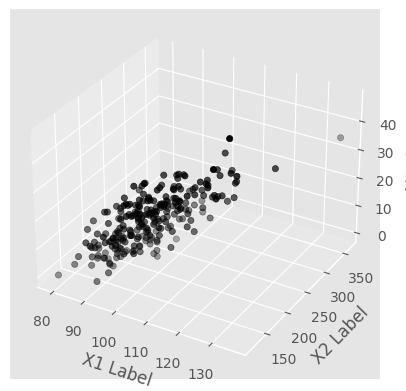

In [166]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X1, X2, Y,  color='black')
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

plt.show()

9.4. Выводы
